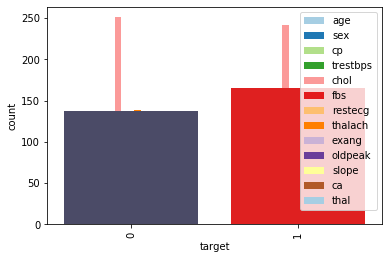

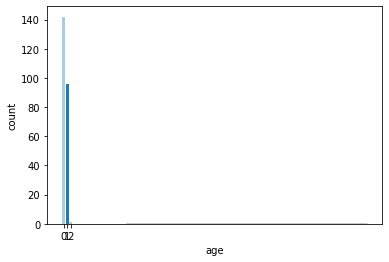

<Figure size 3240x3240 with 0 Axes>

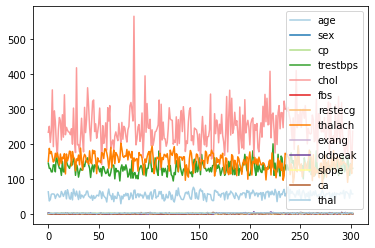

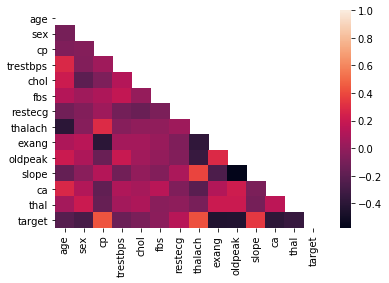

KNeighborsClassifier Accuracy: 0.75
[[25 11]
 [ 8 32]]
KNeighborsClassifier classification report
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        36
           1       0.74      0.80      0.77        40

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76



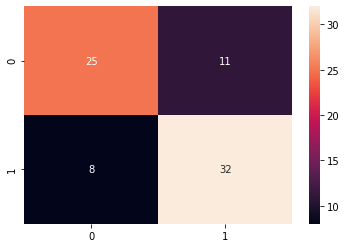

Cross Validation Score

 DecisionTreeClassifier Accuracy: 1.0

		 DecisionTreeClassifier Classification Report

[[36  0]
 [ 0 40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        40

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



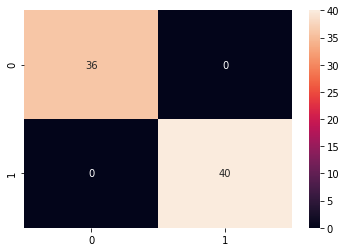

Cross Validation Score

Finding the optimal params for the C param for the SVC model 

Optimal Param for C = 105
SVC Classifier Accuracy: 0.631578947368421
[[15 21]
 [ 7 33]]
              precision    recall  f1-score   support

           0       0.68      0.42      0.52        36
           1       0.61      0.82      0.70        40

    accuracy                           0.63        76
   macro avg       0.65      0.62      0.61        76
weighted avg       0.64      0.63      0.61        76



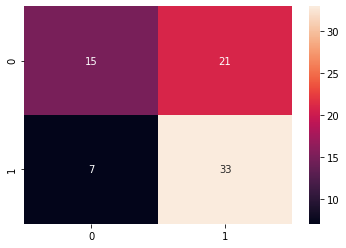

Cross Validation Score

Finding the optimal params for the n_estimators param for the RandomForestClassifier model 

Optimal Param for n_estimators = 15
RandomForestClassifier Accuracy: 0.8157894736842105
[[28  8]
 [ 6 34]]

		RandomForestClassification Report

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        36
           1       0.81      0.85      0.83        40

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.82        76



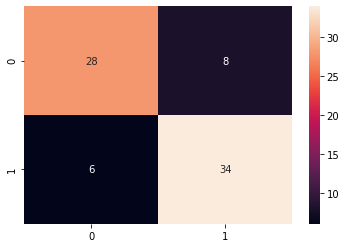

Cross Validation Score

Finding the optimal params for the n_estimators param for the GradientBoostingClassifier model 

Optimal Param for n_estimators = {'learning_rate': 0.26, 'n_estimators': 1}
 GradientBoostingClassifier Accuracy: 0.5263157894736842
[[ 0 36]
 [ 0 40]]

		GradientBoostingClassification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.53      1.00      0.69        40

    accuracy                           0.53        76
   macro avg       0.26      0.50      0.34        76
weighted avg       0.28      0.53      0.36        76



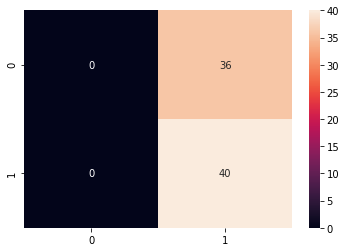

Cross Validation Score



0.5445901639344262

In [3]:
# import necessary libraries
import pandas as pd
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from numpy import arange
warnings.simplefilter('ignore')
#. import the data and view a preview
data = pd.read_csv('heart.csv')
data.head()
#. group by target and get the mean of from sklearn.model_selection import GridSearchCVeach feature
tar = data.groupby('target')
tar.agg('mean').plot(kind='bar')
ui = ['#47476b','#ff0000']
sns.set_palette(ui)
sns.countplot(data['target'])
plt.show()
sns.set_palette(sns.color_palette("Paired"))
#. get the confirmed cases
cases = data.query('target == 1')
sns.countplot(cases['sex'])
sns.countplot(cases['exang'])
sns.countplot(cases['restecg'])
np.mean(cases['age'])
np.std(cases['age'])
sns.distplot(cases['age'])
plt.show()

X = data.drop(columns=['target'])
Y = data['target']
plt.figure(figsize=(45,45))
X.plot()
plt.show()

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,mask=mask)
plt.show()
def find_optimal_params(model,params):
  """
  Get Optimal Parameters for a model

  :param Model: Machine Learning model
  :param Params: Altering params and ranges 

  :return: a json of params and their optimal value 

  """
  grid = GridSearchCV(model,param_grid=params)
  grid.fit(X_train,y_train)
  return grid.best_params_
features = SelectKBest(chi2,k=7)
features.fit(X,Y)
X.columns[features.get_support()]
#.  keep track of the information
models = []
scores = []
X_train,x_test,y_train,y_test = train_test_split(X,Y)

#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Create KNN Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_test,y_test)
predicted = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print("KNeighborsClassifier Accuracy:",metrics.accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))
print("KNeighborsClassifier classification report")
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot = True)
plt.show()

print("Cross Validation Score\n")
np.average(cross_val_score(KNeighborsClassifier (n_neighbors=5),X,Y))

# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model.fit(x_test,y_test)

#Predict the response for test dataset
predicted = model.predict(x_test)
# Model Accuracy, how often is the classifier correct?
print(" DecisionTreeClassifier Accuracy:",metrics.accuracy_score(y_test,predicted))
print("\n\t\t DecisionTreeClassifier Classification Report\n")
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot = True, fmt = "d")
plt.show()
print("Cross Validation Score\n")
np.average(cross_val_score(DecisionTreeClassifier(),X,Y))


print("Finding the optimal params for the C param for the SVC model ")
 #. find the optimal param with a predefined function
optimal_param = find_optimal_params(SVC(kernel='rbf'),{'C':range(0,110,5)})['C']
print("\nOptimal Param for C =",optimal_param)

model = SVC(C = 90,kernel='rbf').fit(X_train,y_train)
test_score = model.score(x_test,y_test)
scores.append(test_score)
predicted = model.predict(x_test)
print("SVC Classifier Accuracy:",metrics.accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.show()

print("Cross Validation Score\n")
np.average(cross_val_score(SVC(C = 90),X,Y))

print("Finding the optimal params for the n_estimators param for the RandomForestClassifier model ")
optimal_param = find_optimal_params(RandomForestClassifier(),{'n_estimators':range(0,20,5)})['n_estimators']
print("\nOptimal Param for n_estimators =",optimal_param)

model = RandomForestClassifier(n_estimators=15).fit(X_train,y_train)
scores.append(model.score(x_test,y_test))
predicted = model.predict(x_test)
print("RandomForestClassifier Accuracy:",metrics.accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted))
print("\n\t\tRandomForestClassification Report\n")
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot=True)
plt.show()
print("Cross Validation Score\n")
np.average(cross_val_score(RandomForestClassifier(n_estimators=15),X,Y))

print("Finding the optimal params for the n_estimators param for the GradientBoostingClassifier model ")
optimal_param = find_optimal_params(GradientBoostingClassifier(),{'learning_rate':arange(0.01,1,0.01),'n_estimators':range(1,5,50)})
print("\nOptimal Param for n_estimators =",optimal_param)

model = GradientBoostingClassifier(learning_rate=0.01,n_estimators=1).fit(X_train,y_train)
scores.append(model.score(x_test,y_test))
predicted = model.predict(x_test)
print(" GradientBoostingClassifier Accuracy:",metrics.accuracy_score(y_test,predicted))
print(confusion_matrix(y_test,predicted)) 
print("\n\t\tGradientBoostingClassification Report\n")
print(classification_report(y_test,predicted))
sns.heatmap(confusion_matrix(y_test,predicted),annot = True)
plt.show()


print("Cross Validation Score\n")
np.average(cross_val_score(GradientBoostingClassifier(learning_rate=0.01,n_estimators=1),X,Y))

